# Import and data extraction

In [1]:
import pandas as pd
import numpy as np
import nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option("display.max_columns", 99)

In [3]:
train = pd.read_csv('data_challenge/boites_medicaments_train.csv',
                    encoding='utf-8',
                    sep=';')

In [4]:
test = pd.read_csv('data_challenge/boites_medicaments_test.csv',
                    encoding='utf-8',
                    sep=';')

In [5]:
print train.shape, test.shape

(8564, 41) (3671, 41)


In [6]:
train.head()

,libelle,libelle_plaquette,libelle_ampoule,libelle_flacon,libelle_tube,libelle_stylo,libelle_seringue,libelle_pilulier,libelle_sachet,libelle_comprime,libelle_gelule,libelle_film,libelle_poche,libelle_capsule,nb_plaquette,nb_ampoule,nb_flacon,nb_tube,nb_stylo,nb_seringue,nb_pilulier,nb_sachet,nb_comprime,nb_gelule,nb_film,nb_poche,nb_capsule,nb_ml,statut,etat commerc,agrement col,tx rembours,forme pharma,voies admin,statut admin,date declar annee,date amm annee,type proc,titulaires,substances,prix
0,3 plaquette(s) thermoformée(s) PVC-Aluminium d...,1,0,0,0,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,0,0,28,0,0,0,0,0,Présentation active,Déclaration de commercialisation,oui,65%,comprimé pelliculé,orale,Autorisation active,2014,2014,Procédure décentralisée,MAJORELLE LUXEMBOURG SOPARFI (LUXEMBOURG),DÉSOGESTREL,2.83
1,plaquette(s) thermoformée(s) aluminium de 28 c...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,28,0,0,0,0,0,Présentation active,Déclaration de commercialisation,oui,65%,comprimé à croquer,orale,Autorisation active,2013,2009,Procédure de reconnaissance mutuelle,TEVA SANTE,"MONTÉLUKAST ACIDE, MONTÉLUKAST SODIQUE",14.30
2,plaquette(s) thermoformée(s) PVC-aluminium de ...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,Présentation active,Déclaration de commercialisation,oui,65%,gélule à libération prolongée,orale,Autorisation active,2000,1996,Procédure nationale,MYLAN SAS,CHLORHYDRATE DE DILTIAZEM,5.66
3,30 sachet(s)-dose(s) papier aluminium complexe...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,Présentation active,Déclaration de commercialisation,oui,65%,granulés à libération prolongée,orale,Autorisation active,2005,2004,Procédure nationale,SANOFI AVENTIS FRANCE,"ACIDE VALPROÏQUE, VALPROATE DE SODIUM",24.27
4,plaquette(s) thermoformée(s) PVC-Aluminium de ...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,Présentation active,Déclaration d'arrêt de commercialisation,non,100%,comprimé pelliculé,orale,Autorisation active,2015,2010,Procédure nationale,TEVA SANTE,LÉTROZOLE,59.94


In [7]:
test.head()

,id,libelle,libelle_plaquette,libelle_ampoule,libelle_flacon,libelle_tube,libelle_stylo,libelle_seringue,libelle_pilulier,libelle_sachet,libelle_comprime,libelle_gelule,libelle_film,libelle_poche,libelle_capsule,nb_plaquette,nb_ampoule,nb_flacon,nb_tube,nb_stylo,nb_seringue,nb_pilulier,nb_sachet,nb_comprime,nb_gelule,nb_film,nb_poche,nb_capsule,nb_ml,statut,etat commerc,agrement col,tx rembours,forme pharma,voies admin,statut admin,date declar annee,date amm annee,type proc,titulaires,substances
0,1,plaquette(s) thermoformée(s) polyamide alumini...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,Présentation active,Déclaration d'arrêt de commercialisation,non,65%,comprimé gastro-résistant(e),orale,Autorisation active,2013,2008,Procédure de reconnaissance mutuelle,TEVA SANTE,"PANTOPRAZOLE SODIQUE SESQUIHYDRATÉ, PANTOPRAZOLE"
1,2,plaquette(s) thermoformée(s) PVC PVDC aluminiu...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,Présentation active,Déclaration de commercialisation,non,30%,capsule,vaginale,Autorisation active,2012,1997,Procédure nationale,INNOTECH INTERNATIONAL,"NYSTATINE, SULFATE DE POLYMYXINE B, SULFATE DE..."
2,3,plaquette(s) thermoformée(s) PVC-Aluminium de ...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,84,0,0,0,0,0,Présentation active,Déclaration d'arrêt de commercialisation,non,65%,comprimé,orale,Autorisation abrogée,2013,2006,Procédure nationale,ACTAVIS FRANCE,PRAVASTATINE SODIQUE
3,4,5 cartouche(s) en verre de 3 ml dans stylo pré...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Présentation active,Déclaration d'arrêt de commercialisation,non,65%,suspension injectable,sous-cutanée,Autorisation active,2012,2000,Procédure centralisée,SANOFI AVENTIS (ALLEMAGNE),INSULINE HUMAINE RECOMBINANTE ISOPHANE BIPHASI...
4,5,5 poche(s) à 3 compartiments polyamide polypro...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1875,Présentation active,Déclaration de commercialisation,oui,65%,émulsion pour perfusion,intraveineuse,Autorisation active,2011,2011,Procédure décentralisée,B BRAUN MELSUNGEN,"PHOSPHATE MONOSODIQUE DIHYDRATÉ, ARGININE, MAG..."


# Data description

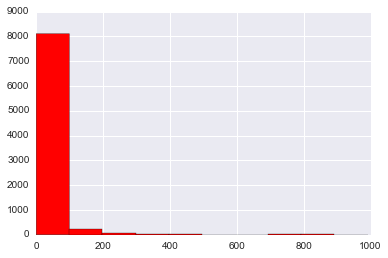

In [8]:
train['prix'].hist(color="red")

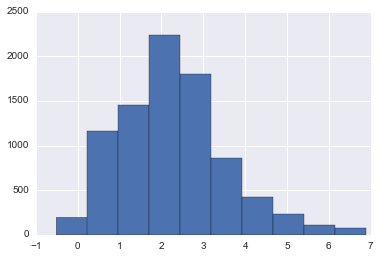

In [13]:
# The distribution above is too large
# Thus, we will use logs instead

train['logprix'] = train['prix'].apply(np.log)
train['logprix'].hist()

/Users/Sheraf/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


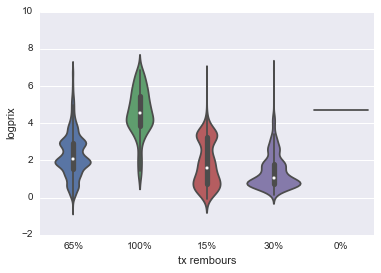

In [14]:
sns.violinplot(y="logprix", x="tx rembours", data=train)

# We are trying to estimate the influence
# of the column "tx rembours" on the log(prix)

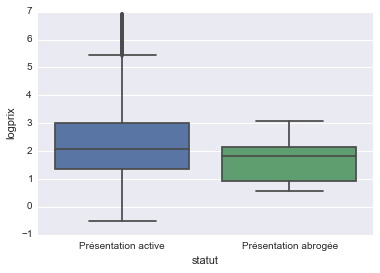

In [15]:
sns.boxplot(y="logprix", x="statut", data=train)

# Influence of "statut" on the price

# Data formatting & Engineering

In [9]:
tokens = []
for subs in train.substances.values:
    tokens.append(len(subs.split(",")))
    
tokens2 = []
for subs in test.substances.values:
    tokens2.append(len(subs.split(",")))

In [10]:
train['tokens'] = tokens
test['tokens'] = tokens2

In [11]:
train['length'] = train['substances'].apply(len)
test['length'] = test['substances'].apply(len)

In [38]:
# Columns features categorization

# numbers
feat_num = ['libelle_plaquette', 'libelle_ampoule', 'libelle_flacon', 
            'libelle_tube', 'libelle_stylo', 'libelle_seringue',
            'libelle_pilulier', 'libelle_sachet', 'libelle_comprime', 
            'libelle_gelule', 'libelle_film', 'libelle_poche',
            'libelle_capsule'] + ['nb_plaquette', 'nb_ampoule', 
            'nb_flacon', 'nb_tube', 'nb_stylo', 'nb_seringue',
            'nb_pilulier', 'nb_sachet', 'nb_comprime', 'nb_gelule', 
            'nb_film', 'nb_poche', 'nb_capsule', 'nb_ml']

# dates
feat_dates = ['date declar annee', 'date amm annee']

# "categories"
feat_cat = ['statut', 'etat commerc', 'agrement col', 'tx rembours',
          'voies admin', 'statut admin', 'type proc']
# "strings"
feat_text = ['libelle', 'titulaires', 'substances', 'forme pharma']

length = ['length']

In [39]:
# LabelEncoder() will help us 
# to convert categories into numbers,
# so imputs will be valid for the ML algorithm

for cat in feat_cat:
    le = LabelEncoder()
    le.fit(train[cat].append(test[cat]))
    train[cat] = le.transform(train[cat])
    test[cat] = le.transform(test[cat])

# Model Creation

In [40]:
def mape_error(y_true, y_pred):
    '''
    Mean Absolute Percentage Error
    Cost function not included on scikit-learn
    '''
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [41]:
err = 0
NBROUND = 5
FEATURES = feat_num+feat_cat+feat_dates+length # Features used for this model
for train_index, test_index in KFold(train.shape[0], n_folds=NBROUND):
    y = train['logprix']
    X = train[FEATURES]
    X_train, X_test = X.ix[train_index, :], X.ix[test_index, :]
    y_train, y_test = y[train_index], y[test_index]
    clf = RandomForestRegressor()
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    # We apply the exp function to cancel the log
    err += mape_error(np.exp(y_test), np.exp(pred))
    print mape_error(np.exp(y_test), np.exp(pred))
print "*** MAPE Error :", err / NBROUND
# Estimation of the cost percentage

52.0663794439
48.9462516277
46.1305660142
47.2053101136
45.2623674209
*** MAPE Error : 47.922174924


# Submission

In [146]:
clf = RandomForestRegressor()
# The model is trained again, but this time on the whole dataset
clf.fit(train[FEATURES], train['logprix'])
predictions = np.exp(clf.predict(test[feat_num+feat_cat+feat_dates+length]))

In [147]:
pd.DataFrame(predictions, index=test['id']).to_csv('soumission2.csv',
                        header=['prix'],
                        sep = ';')